In [6]:
import pandas as pd
import requests
from io import StringIO

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
response = requests.get(url)
covid_df = pd.read_csv(StringIO(response.text))


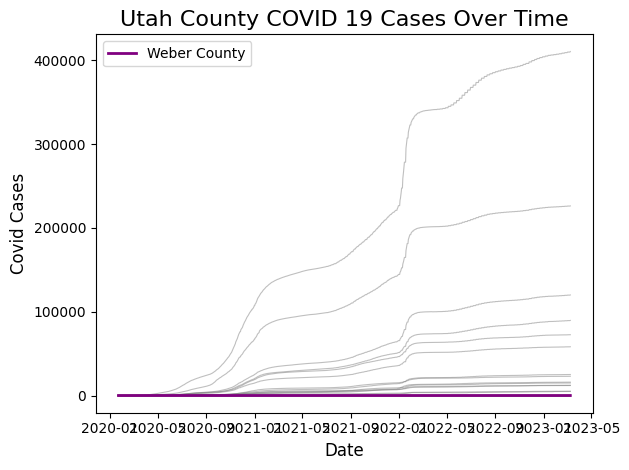

In [33]:
# question 1 
# first thing to do is filter the Utah counties 
utah_data = covid_df[covid_df['Province_State'] == 'Utah']
#the following will keep the time series data 
utah_data = utah_data.groupby('Admin2').sum().iloc[:, 11:]
utah_data = utah_data.T  #plotting 
#Converting the dates to datatime 
utah_data.index = pd.to_datetime(utah_data.index, format="%m/%d/%y")

#unique county to highlight(weber county where I'm from) 
highlight_county = 'Weber'
highlighted_data = utah_data[highlight_county]

#plot all counties in grey 
for county in utah_data.columns:
    if county != highlight_county:
        plt.plot(utah_data.index, utah_data[county], color='grey', alpha=0.5, linewidth=0.8)

# Weber county in diff color 
plt.plot(utah_data.index, highlighted_data, color='purple', linewidth=2, label=f'{highlight_county} County')

#format the plot 
plt.title('Utah County COVID 19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Covid Cases', fontsize=12)
plt.tight_layout()
plt.legend()

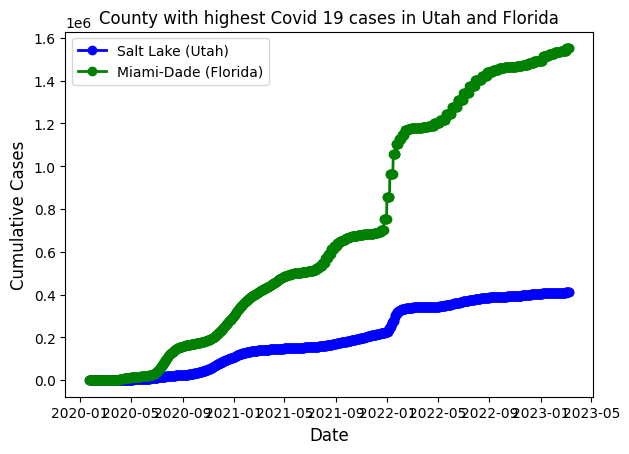

In [38]:
#question 2 
#find the counties with the most cases from UT and FL
#first filter data for these states 
utah_data = covid_df[covid_df['Province_State'] == 'Utah']
florida_data = covid_df[covid_df['Province_State'] == 'Florida']
# get the counties with the most cases 
#starting with UT 
utah_data = utah_data.groupby('Admin2').sum().iloc[:, 11:]  # First we will have to sum the county to get the total cases for each county
utah_data = utah_data.T
utah_data.index = pd.to_datetime(utah_data.index, format="%m/%d/%y")  #the format 
utah_most_cases_county = utah_data.sum(axis=0).idxmax()  # this will find the county with the most cases 
utah_most_cases_data = utah_data[utah_most_cases_county]

#doing the same thing as above but with Florida 
florida_data = florida_data.groupby('Admin2').sum().iloc[:, 11:]  # Sum by county
florida_data = florida_data.T
florida_data.index = pd.to_datetime(florida_data.index, format="%m/%d/%y")
florida_most_cases_county = florida_data.sum(axis=0).idxmax()  # Find the county with the most cases in Florida
florida_most_cases_data = florida_data[florida_most_cases_county]

#utah plot 
plt.plot(utah_data.index, utah_most_cases_data, color='blue', linewidth=2, label=f'{utah_most_cases_county} (Utah)', linestyle='-', marker='o')
#florida plot 
plt.plot(florida_data.index, florida_most_cases_data, color='green', linewidth=2, label=f'{florida_most_cases_county} (Florida)', linestyle='-', marker='o')

#formating the plot 
plt.title('County with highest Covid 19 cases in Utah and Florida')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)
plt.legend()
plt.tight_layout()

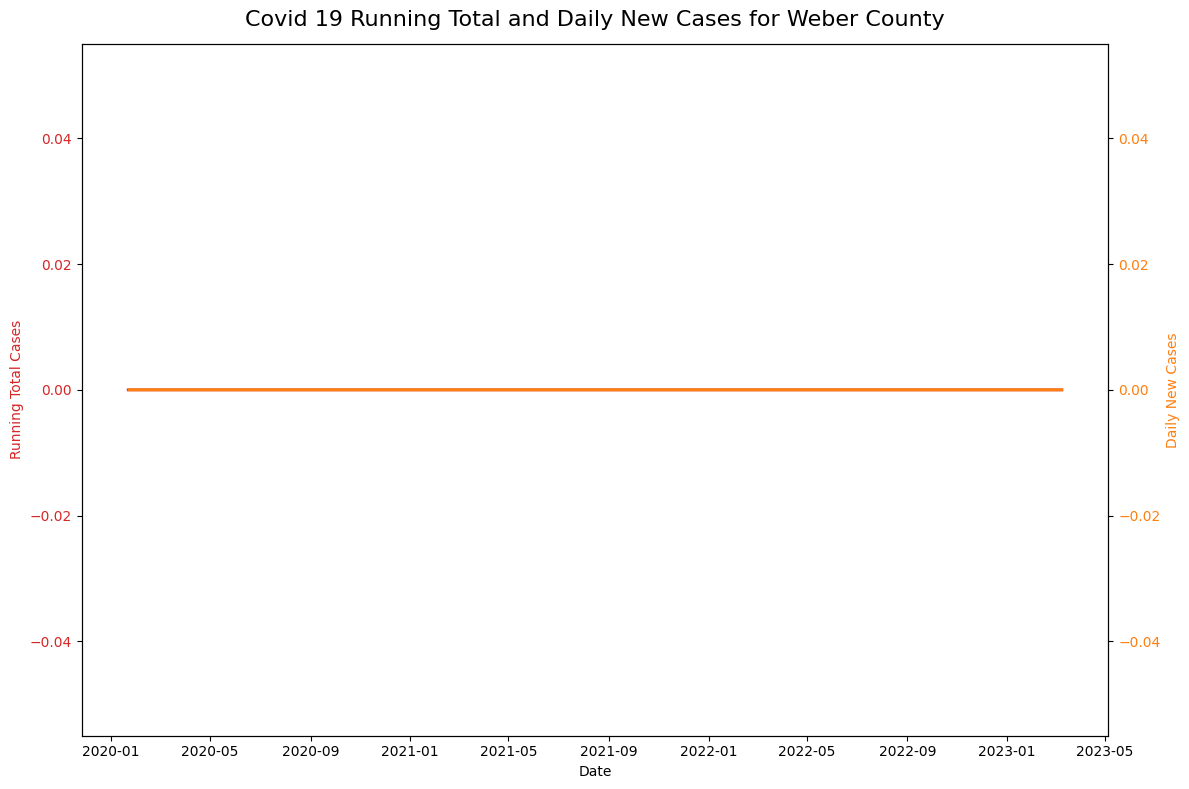

In [64]:
#question 3 creating a visual that shows the running total of cases and daily new cases for a single county 
#selecting a county 
county_name = 'Weber'
#filter through the UT data 
county_data = covid_df[(covid_df['Province_State'] == 'Utah') & (covid_df['Admin2'] == county_name)]

#drop columns not needed
county_data = county_data.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
#sorting of the data
#transpose to have dates as rows
county_data = county_data.T  
#county name 
county_data.index = pd.to_datetime(county_data.index, format="%m/%d/%y", errors='coerce')
#data must be numeric 
#drop rows that can't be numeric
county_data = county_data.dropna()
county_data = county_data.apply(pd.to_numeric, errors='coerce')
county_data.columns = [county_name]  

# calculate running total and daily new cases 
county_data['Running Total'] = county_data[county_name].cumsum()  #sum 
county_data['Daily New Cases'] = county_data[county_name].diff()  #difference

#plot for the running total 
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_xlabel('Date')
ax1.set_ylabel('Running Total Cases', color='tab:red')
ax1.plot(county_data.index, county_data['Running Total'], color='tab:red', label='Running Total', linewidth=2)
ax1.tick_params(axis='y', labelcolor='tab:red')

#plot for new cases
ax2 = ax1.twinx()
ax2.set_ylabel('Daily New Cases', color='tab:orange')
ax2.plot(county_data.index, county_data['Daily New Cases'], color='tab:orange', label='Daily New Cases', linewidth=2)
ax2.tick_params(axis='y', labelcolor='tab:orange')

#formatting 
fig.suptitle(f'Covid 19 Running Total and Daily New Cases for Weber County', fontsize=16)
fig.tight_layout()


Text(0, 0.5, 'Cases')

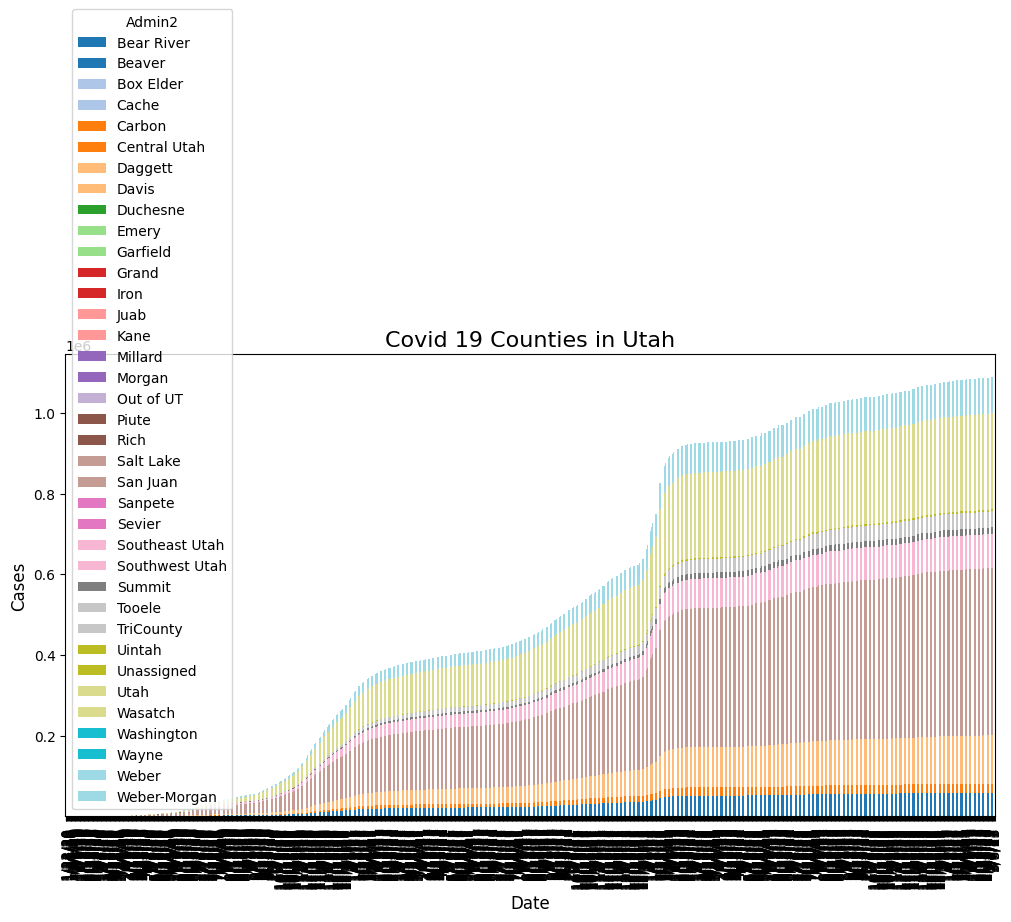

In [49]:
#question 4  stacked bar char for utah 
# filter for the state 
state = 'Utah' 
state_data = covid_df[covid_df['Province_State'] == state]
# filter columns not needed 
state_data = state_data.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
#sum the cases in the counties 
county_data = state_data.groupby('Admin2').sum()

#creating the plot 
fig, ax = plt.subplots(figsize=(12, 8))
county_data.T.plot(kind='bar', stacked=True, ax=ax, colormap='tab20', figsize=(12, 6))

#format for the plot 
ax.set_title(f'Covid 19 Counties in Utah', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cases', fontsize=12)

